In [320]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Classes')

# Import custom classes
import Regression
import PlotTools

#Reload Classes to avoid having to restart kernel
from importlib import reload
reload(Regression)
reload(PlotTools)

from Regression import *
from PlotTools import *

from matplotlib.animation import FuncAnimation




# Implicit Projection


Show that $\phi(x_1)\cdot \phi(x_2)$ and $K(x_1, x_2)$ are indeed equal.


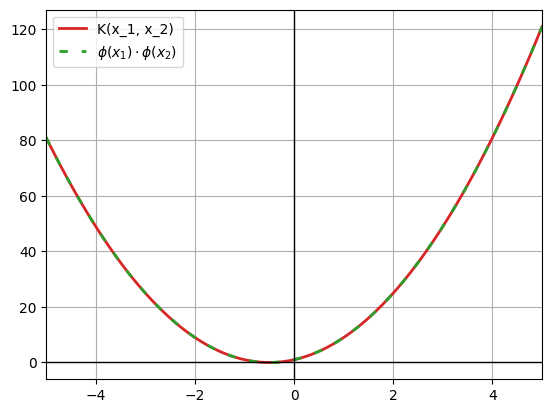

In [321]:
x_1 = 2
x_2 = np.linspace(-5, 5, 100)

def K(x1, x2):
    return (1 + x1*x2)**2

def phi(x):
    return np.array([1, np.sqrt(2)*x, x**2])

def projection(x1, x2):
    return phi(x1) @ phi(x2) 


fig, ax = plt.subplots()

ax.set_xlim(-5, 5)
coordinate_axes(ax)


projections = [projection(x_1, x2) for x2 in x_2]
ax.plot(x_2, K(x_1, x_2), label='K(x_1, x_2)', lw = 2, color = 'tab:red')
ax.plot(x_2, projections, '--', label=r'$\phi(x_1) \cdot \phi(x_2)$', lw=2, dashes=(3, 5), color = 'tab:green')

ax.legend()
ax.grid()

# Parity plot

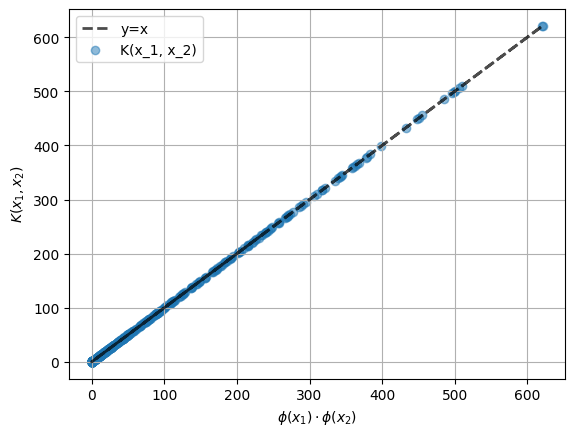

In [322]:
N_points = 500
x1s = np.random.uniform(-5, 5, N_points)
x2s = np.random.uniform(-5, 5, N_points)

Ks =[]
projections= []
for x1, x2 in zip(x1s, x2s):
    Ks.append(K(x1, x2))
    projections.append(projection(x1, x2))
    

fig, ax = plt.subplots()
ax.plot(projections, projections,'--', color='black', lw=2, label='y=x', alpha = 0.7)
ax.scatter(projections, Ks, color='tab:blue', alpha=0.5, rasterized=True, label='K(x_1, x_2)')
ax.set(xlabel=r'$\phi(x_1) \cdot \phi(x_2)$', ylabel=r'$K(x_1, x_2)$')
ax.grid()

ax.legend()


# The RBF Descriptor

In [323]:
sigma = 1
sigma_phi = 1/np.sqrt(2)    
A = 0.5006623887045548
dx = 0.01

x_is = np.arange(-12, 12.01, dx)

def K_gauss(x1, x2):
    return np.exp(-(x1 - x2)**2 / (2*sigma**2))

x1 = np.random.uniform(-5, 5)
x2 = np.random.uniform(-5, 5)

K_gauss(x1, x2)

1.5984950884462292e-06

In [324]:
#Test that the 

x1 = 0.5
x2 = 0.25
for dx in [0.1, 0.02, 0.04, 0.008, 0.0016, 0.00032, 0.000064]:
    discrete_rbf = DiscreteRBF(xwidth=dx)
    print(f'Phi(x1) * Phi(x1) = {discrete_rbf.descriptor(x1) @ discrete_rbf.descriptor(x1):.15f}')
    print(f'Phi(x2) * Phi(x2) = {discrete_rbf.descriptor(x2) @ discrete_rbf.descriptor(x2):.15f}')
    print(f'Phi(x1) * Phi(x2) = {discrete_rbf.descriptor(x1) @ discrete_rbf.descriptor(x2):.15e}\n')

print('Conclusion: The accuracy becomes better for smaller dxs')


Phi(x1) * Phi(x1) = 0.985616238638927
Phi(x2) * Phi(x2) = 1.014383772062232
Phi(x1) * Phi(x2) = 4.393693338831794e-02

Phi(x1) * Phi(x1) = 1.000000000000022
Phi(x2) * Phi(x2) = 1.000000000000022
Phi(x1) * Phi(x2) = 4.393693362340837e-02

Phi(x1) * Phi(x1) = 1.000000000000102
Phi(x2) * Phi(x2) = 1.000000000000021
Phi(x1) * Phi(x2) = 4.393693362341088e-02

Phi(x1) * Phi(x1) = 1.000000000000111
Phi(x2) * Phi(x2) = 1.000000000000111
Phi(x1) * Phi(x2) = 4.393693362341228e-02

Phi(x1) * Phi(x1) = 1.000000000000110
Phi(x2) * Phi(x2) = 1.000000000000111
Phi(x1) * Phi(x2) = 4.393693362341226e-02

Phi(x1) * Phi(x1) = 0.999999999999000
Phi(x2) * Phi(x2) = 0.999999999999000
Phi(x1) * Phi(x2) = 4.393693362336348e-02

Phi(x1) * Phi(x1) = 0.999999999999000
Phi(x2) * Phi(x2) = 0.999999999999000
Phi(x1) * Phi(x2) = 4.393693362336350e-02

Conclusion: The accuracy becomes better for smaller dxs


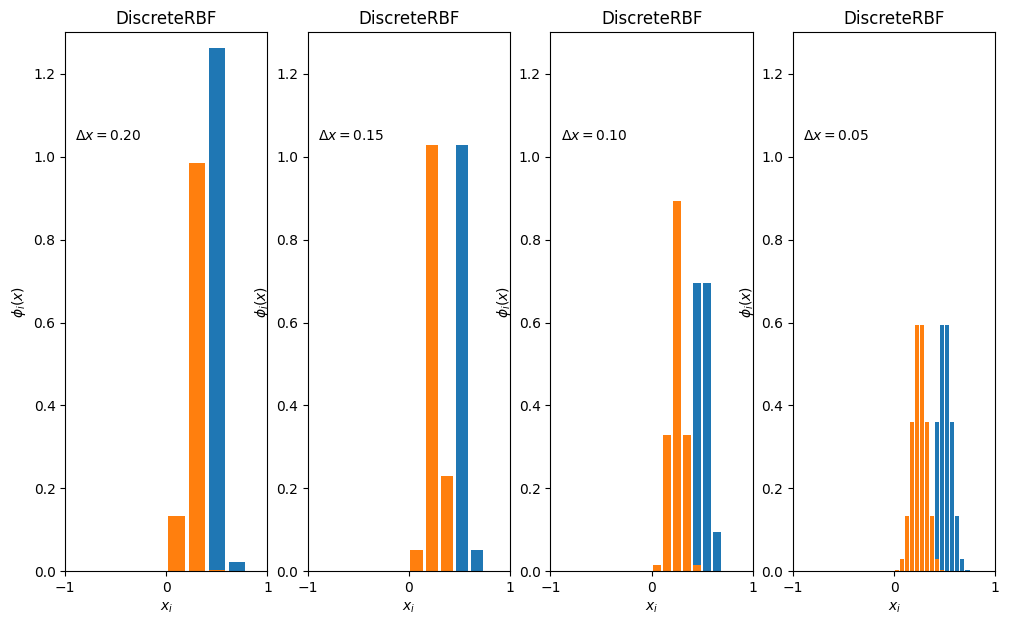

In [325]:
fig, axes = plt.subplots(1,4,figsize=(12,7))
dxs = [0.2, 0.15, 0.1, 0.05]

for ax, dx in zip(axes,dxs):
    discrete_rbf = DiscreteRBF(xwidth=dx)
    discrete_rbf.draw(0.5,ax)
    discrete_rbf.draw(0.25,ax)
    ax.text(0.05,0.8,rf'$\Delta x={dx:.2f}$',transform = ax.transAxes)
    ax.set(xlim=(-1,1),ylim=(0, 1.3))

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: >]


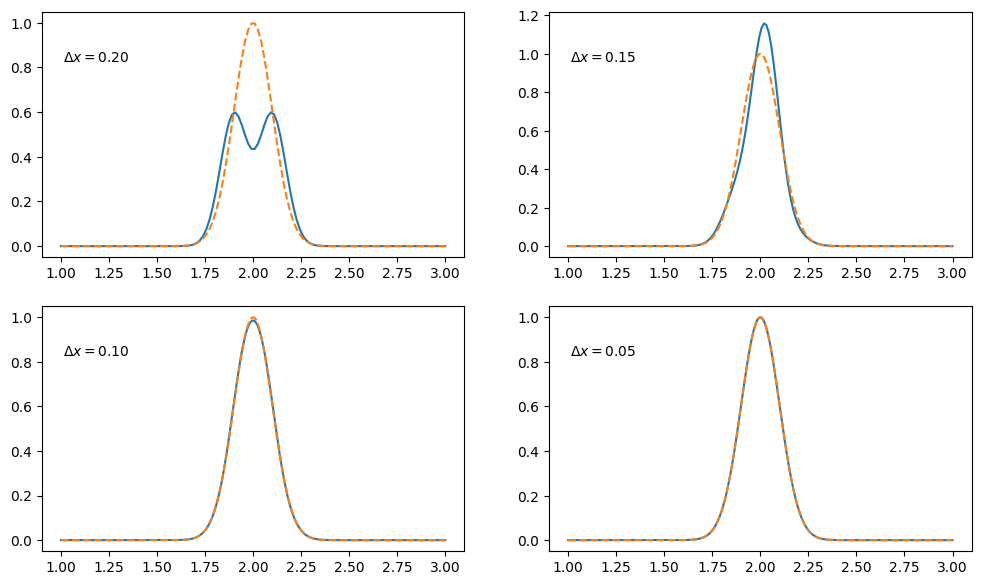

In [344]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
dxs = [0.2, 0.15, 0.1, 0.05]
sigma = 0.1
x1 = 2

axes = axes.flatten()

for ax, dx in zip(axes,dxs):
    discrete_rbf = DiscreteRBF(xwidth=dx)
    N = len(discrete_rbf.bin_edges) -1
    sigma = discrete_rbf.sigma_kernel

    x2 = np.linspace(1, 3, N)
    projections = [discrete_rbf.descriptor(x1) @ discrete_rbf.descriptor(x) for x in x2]
    Ks = K_gauss(x1, x2)
    ax.plot(x2, projections)
    ax.plot(x2, Ks, '--')
    ax.text(0.05,0.8,rf'$\Delta x={dx:.2f}$',transform = ax.transAxes)
    


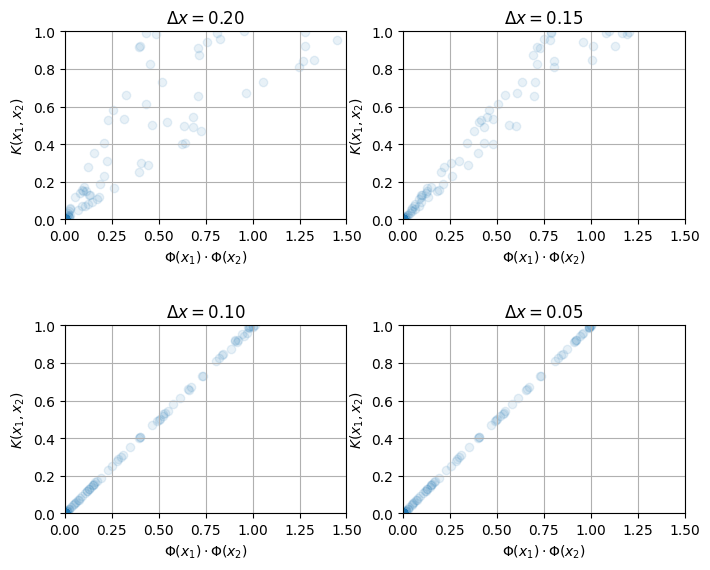

In [342]:
fig, axes = plt.subplots(2,2,figsize=(8,7))
axes = np.ravel(axes)
vals = 10*(np.random.rand(1000,2) -0.5)
for ax, dx in zip(axes,[0.2,0.15,0.1,0.05]):
    discrete_rbf = DiscreteRBF(xwidth=dx)
    dot_products = []
    kernels = []
    for x1,x2 in vals:
        dot_product = discrete_rbf.descriptor(x1) @ discrete_rbf.descriptor(x2)
        kernel = K_gauss(x1,x2)
    
        dot_products.append(dot_product)
        kernels.append(kernel)
    ax.scatter(dot_products,kernels,alpha=0.1)
    ax.set_xlabel(r'$\Phi(x_1)\cdot\Phi(x_2)$')
    ax.set_ylabel(r'$K(x_1,x_2)$')
    ax.set(xlim=(0,1.5),ylim=(0,1))
    ax.grid('on')
    ax.set_aspect('equal')
    ax.set_title(rf'$\Delta x={dx:.2f}$')




[<Axes: > <Axes: > <Axes: > <Axes: >]


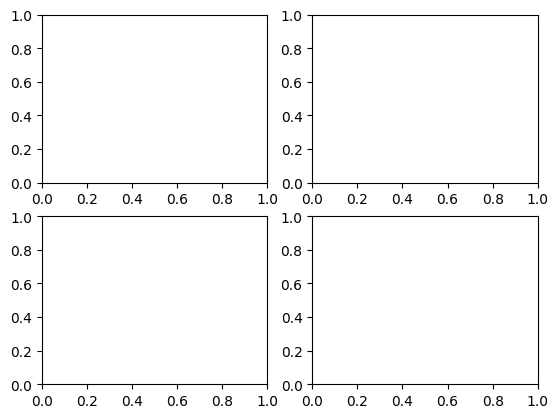

In [341]:
fig, ax = plt.subplots(2,2)

ax = np.ravel(ax)
print(ax)

